In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import scipy
import os
#plt.rcParams.update({'font.size':17})

In [2]:
#data
#name1, name2, mass1, mass2, xcm, ycm, zcm, a, ecc, P, time 

#List creation and sorting
binaryfile_list=[]
path="/home/studente/Scrivania/MapelliProject/Sorted_for_mass/" #insert correct path!
file_list=os.listdir(path)
numfiles=len(file_list)
#filesorted=sorted(file_list)
print(file_list)

['sorted_results_no_bin_stel_ev_m2_e4_6.txt', 'sorted_results_no_bin_stel_ev_m2_e4_10.txt', 'sorted_results_no_bin_stel_ev_m2_e4_4.txt', 'sorted_results_stel_ev_m2_e4_2.txt', 'sorted_results_stel_ev_m2_e4_9.txt', 'sorted_results_no_bin_stel_ev_m2_e4_5.txt', 'sorted_results_stel_ev_m2_e4_3.txt', 'sorted_results_no_bin_stel_ev_m2_e4_7.txt', 'sorted_results_stel_ev_m2_e4_10.txt', 'sorted_results_no_bin_stel_ev_m2_e4_3.txt', 'sorted_results_stel_ev_m2_e4_8.txt', 'sorted_results_no_bin_stel_ev_m2_e4_8.txt', 'sorted_results_stel_ev_m2_e4_4.txt', 'sorted_results_no_bin_stel_ev_m2_e4_9.txt', 'sorted_results_no_bin_stel_ev_m2_e4_1.txt', 'sorted_results_stel_ev_m2_e4_1.txt', 'sorted_results_no_bin_stel_ev_m2_e4_2.txt', 'sorted_results_stel_ev_m2_e4_6.txt', 'sorted_results_stel_ev_m2_e4_7.txt']


In [3]:
#CONVERTION CONSTANT FOR BINDING ENERGY, final UNITS:  km2/s2
G=6.67e-11
#Ebin=Gm1m2/2a   

const=(G*1.989e30/1.496e11)*1e-6
print (const)

886.8068181818181


In [27]:
#Calculate mean values:
filepath=path+'sorted_results_stel_ev_m2_e4_10.txt'
#print(file_list[0])
    
n1,n2,m1,m2, xcm, ycm, zcm, a, ecc, P, time = np.genfromtxt(filepath,dtype="float", comments='#',\
                                                                unpack=True, usecols=(0,1,2,3,4,5,6,7,8,9,10))  
#CHANGE WITH CURRENT ID NAMES OF BH IN FILE!
NAME1=[7]      
NAME2=[11]
emean=[]
Pmean=[]
ECC=[]
PERIOD=[]
MASS1=[]
MASS2=[]
q=[]
E_bin=[]
EBIN=[]

for t in range (len(NAME1)):
    for s in range(len(n1)):
        if ((n1[s]==NAME1[t]) and (n2[s]==NAME2[t])) or (n1[s]==NAME2[t]) and (n2[s]==NAME1[t]) :
            ECC.append(ecc[s])
            PERIOD.append(P[s])
            MASS1.append(m1[s])
            MASS2.append(m2[s])
            E_bin.append(const*(m1[s]*m2[s])/(2*a[s]))
    EBIN.append(np.mean(np.array(E_bin)))
    MASS1=np.mean(np.array(MASS1))
    MASS2=np.mean(np.array(MASS2))
    q.append(MASS1/MASS2)
    ECC=np.array(ECC)
    PERIOD=np.array(PERIOD)
    emean.append(np.mean(ECC[:]))
    Pmean.append(np.mean(PERIOD[:]))
    ECC=[]
    PERIOD=[]
    MASS1=[]
    MASS2=[]
    E_bin=[]
    
print(emean)
print(Pmean)
print(q)
print(EBIN)

[0.71928521608867]
[118079045.84236453]
[0.5045413918300224]
[6.814984386009212]


In [72]:
#Storage
q1stelev=np.array([0.6678595302013538, 0.596981765922738, 0.6090444423061873])
q2stelev=np.array([0.7383017619188829])
q3stelev=np.array([0.8957071001974765, 0.41593123144894356, 0.7636407774768678])
q4stelev=np.array([0.9159413400012434])
q6stelev=np.array([0.667382743053394, 0.8919908774194758, 0.8679345404245737])
q7stelev=np.array([0.7689127429065387])
q8stelev=np.array([0.8202023547966144, 0.9153368673229189, 0.6706823923510249, 0.8177035684289565, 0.694597519269046])
q9stelev=np.array([0.7914898042305846])
q10stelev=np.array([0.5045413918300224])


q1nobin=np.array([0.7976848483232523, 0.5429451171254143, 0.991718529254045, 0.7325830414770084, 0.7387005686261058])
q2nobin=np.array([0.8975388441567241])
q3nobin=np.array([0.37833345624010845, 0.4698019235402, 0.7785136843418761])
q4nobin=np.array([0.22370761605179784, 0.36162439453272055, 0.618618708897849])
q5nobin=np.array([0.2937109874606452])
q6nobin=np.array([0.7587837509686427, 0.6241831431058887])
q7nobin=np.array([0.6352659550567856])
q8nobin=np.array([0.7469626704532817])
q9nobin=np.array([0.8642543611786166])
q10nobin=np.array([0.8964273363665151, 0.7168536696539939])

<IPython.core.display.Javascript object>


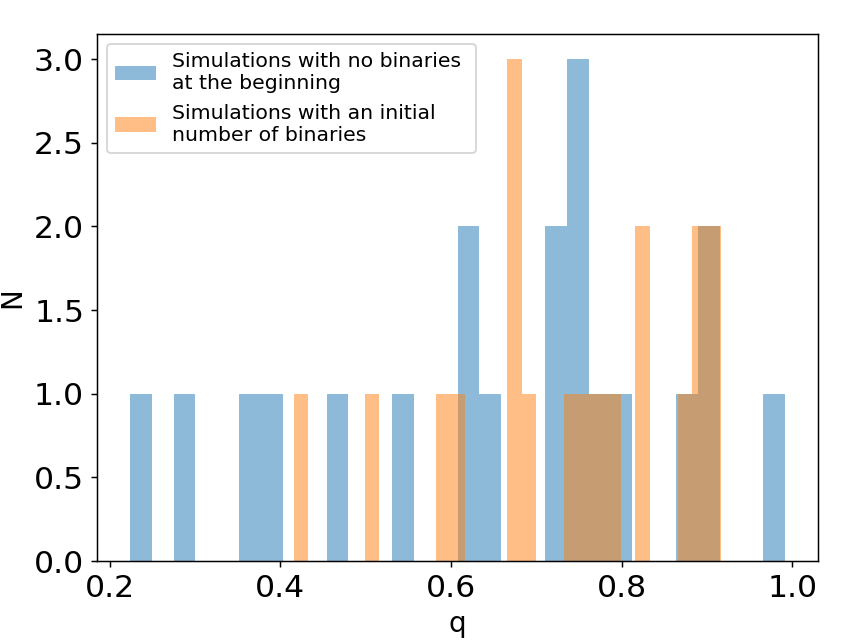

In [88]:
#Mass Ratio histogram
qstelev=np.concatenate((q1stelev,q2stelev,q3stelev,q4stelev,q6stelev,q7stelev,q8stelev,q9stelev,q10stelev))
qnobin=np.concatenate((q1nobin,q2nobin,q3nobin,q4nobin,q5nobin,q6nobin,q7nobin,q8nobin,q9nobin,q10nobin))
plt.hist(qnobin, bins=30,alpha=0.5,density=False, histtype='stepfilled', label='Simulations with no binaries \nat the beginning')
plt.hist(qstelev, bins=30,alpha=0.5,density=False, histtype='stepfilled', label='Simulations with an initial \nnumber of binaries')
#plt.hist([nobin_q,q],bins=20,density=False, histtype='stepfilled', \
# label=['Simulations with no binaries \n at the beginning','Simulations with an initial number \n of binaries'])
plt.tight_layout()
plt.xlabel('q', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.legend(loc='upper left', fontsize=11)
plt.show()
filename="histmassratio.png"
plt.savefig(filename, dpi=300)


In [7]:
#FINAL MEAN VALUES

#NOBINSTELEV
M=np.array([9.68,15.3,4.19,7.29,7.31,18.1,12.3,9.20,67.1,17.7,12.2,23.4,23.4,4.83,16.4,18.2,5.02,18.1,20.2,6.51])
Mmean=np.mean(M)
P=np.array([3313.408027858136, 6987.336014870189, 7154695.76799878, 411167232.0, 110023064.57142857,
            183746.1038465326,309881.29231667134, 3754389.071182171, 6704114390.0,94530.51833674952,
            462744.00800000003, 2610685.725,33246680.666666668,248811.7984687023, 3239736.248714115,
            97819004.29268293,132961.48983439727,230652.62567901233,296587.490353394, 1738200.7686804736 ])
Pmean=np.mean(P)
ecc=np.array([0.5455895998878071, 0.20321334253804832, 0.426974513818792, 0.924684167, 0.9393685248571427,
              0.1849878441436192,0.782871515091036, 0.9124460941014212, 0.9504990407142857,0.6282919944975143,
            0.7711593506666666, 0.9664837957,0.698776414,0.23029553407328243, 0.3283024363951624,0.5744554353170732,             0.5787040208569284,0.5580930613168724,0.9019447339489153, 0.6864090003405326])
eccmean=np.mean(ecc)
Ebin=np.array([3517.407470522403, 16966.226675242826, 17.575866221716797, 0.8706206205524738, 2.1583620342347474,
               693.1448178561565,205.36511902601336, 27.84339606356137, 0.1246428244187316,682.9174474464788,
               173.49043687597606, 173.0967358074325,10.517332108948663,61.985987230297816, 348.8665808830953,
             13.680354763608134,99.55676714417609,592.8395181762879, 607.892375572778, 27.5026650988471])
Ebinmean=np.mean(Ebin)
q=np.array([0.7976848483232523, 0.5429451171254143, 0.991718529254045, 0.7325830414770084, 0.7387005686261058, 
            0.8975388441567241,0.37833345624010845, 0.4698019235402, 0.7785136843418761,0.22370761605179784,
            0.36162439453272055, 0.618618708897849,0.2937109874606452,0.7587837509686427, 0.6241831431058887,
           0.6352659550567856,0.7469626704532817,0.8642543611786166,0.8964273363665151, 0.7168536696539939])
qmean=np.mean(q)

print(Mmean,Pmean,eccmean,Ebinmean,qmean)
 


15.8215 368841914.7591616 0.6396775209632549 1211.1531585759901 0.6534106303405736


In [8]:
#STELEV
M=np.array([12.5,20.1,20.2,7.06,6.13,14.6,7.57,17.7,17.9,5.49,20.1,16.9,10.7,15.1,12.1,13.1,14.4,4.51,11.2])
Mmean=np.mean(M)
P=np.array([558704.555071161, 448560.55073689896, 389329.57649776794,1417086.9050441177,
            153058.67314903962, 11105248.998607889, 505258.3329038461,33005.37604963153,32481333.829697397,
            436893.0598711201, 451383793.06666666,53709295.82054993,50849.84487966344, 543702935.5789474,
            68232.31369383459, 122721.04700000002, 5588169600.0,862186.4285934248,118079045.84236453])
Pmean=np.mean(P)
ecc=np.array([0.7419646645196629, 0.247514571452188, 0.2216372646674107,0.4046211826655883,0.36046503003549724, 
              0.8136262980779583, 0.6649515926923079,0.279041360778917,0.37777266732301196, 0.9833850106072873,
              0.9292826055333332,0.4104797850313458,0.669862135774672, 0.2757974855263157, 0.28328255218796994,
              0.5944718073333334, 0.7222407457500001,0.626451215770104,0.71928521608867])
eccmean=np.mean(ecc)
Ebin=np.array([173.5305484571909, 427.08050259502346, 477.3524496951887,36.402205591426934,128.78814268826918,
               30.185562778963785, 81.30999043411254,2204.4660078461898,20.84063993604811, 53.26026187170934,
               4.527237577896672,35.320413494342894,682.6762991495148, 2.707595072662435, 657.8949667094699, 
               530.2545415301927, 0.47328376553932006,24.132341640862222,6.81498438600921])
Ebinmean=np.mean(Ebin)
q=np.array([0.6678595302013538, 0.596981765922738, 0.6090444423061873,0.7383017619188829,0.8957071001974765, 
            0.41593123144894356, 0.7636407774768678,0.9159413400012434,0.667382743053394, 0.8919908774194758,
            0.8679345404245737,0.7689127429065387,0.8202023547966144, 0.9153368673229189, 0.6706823923510249, 
            0.8177035684289565, 0.694597519269046,0.7914898042305846,0.5045413918300224])
qmean=np.mean(q)

print(Mmean,Pmean,eccmean,Ebinmean,qmean)

13.018947368421053 358088270.51580656 0.5434806943060827 293.5798934326638 0.7375885658687811
